# Packages Required

In [1]:
library(dplyr)
library(mltools)
library(data.table)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last



The above warning simply indicates that the package 'dplyr' shares function names with some functions of base R and the R stats package and that the 'dplyr' package will provide the functions for filter, lag, intersect, setdiff, setequal, and union as oppossed to their definitions from base R or R stats respectively and that the 'mltools' package then also masks the functions between, first, and last from the package 'dplyr'.

'dplyr' is required for the select() function used when dividing the raw data into selected and organized tables in the Dividing Tables section as well as for the inner_join() function used to recombine the divided tables into one dataset in the Recombining the Data section.

'mltools' is used for the one_hot() function that one-hot encodes multi-class, categorical variables in the Data-Cleaning section. In order to perform this function,

# Loading the Data and First Impressions

In [2]:
med_raw_data <- read.csv(file="medical_raw_data.csv")
summary(med_raw_data)

       X           CaseOrder      Customer_id  
 Min.   :    1   Min.   :    1   A01882 :   1  
 1st Qu.: 2501   1st Qu.: 2501   A02880 :   1  
 Median : 5000   Median : 5000   A03496 :   1  
 Mean   : 5000   Mean   : 5000   A04182 :   1  
 3rd Qu.: 7500   3rd Qu.: 7500   A05530 :   1  
 Max.   :10000   Max.   :10000   A08637 :   1  
                                 (Other):9994  
                               Interaction  
 0001dba2-59e1-43a7-ad99-647531de9efe:   1  
 0019a5ff-a005-49f6-837f-5896e8da2e1c:   1  
 0019f8df-fa72-48a8-bdf9-c5cbb9091709:   1  
 002132f6-48de-454e-8060-f59566e24f2f:   1  
 002e0f8b-2929-43cc-8f00-0a8675487362:   1  
 00361875-c9a0-4117-8cd6-3a3d689d0c76:   1  
 (Other)                             :9994  
                               UID                City          State     
 000116de50ddc69ef21f946cac6c6389:   1   Houston    :  36   TX     : 553  
 0005769c90289e51fb41fa41263463fc:   1   San Antonio:  26   CA     : 550  
 000f61c39834b0cee16b8520b5dd66

The summary of the loaded data provides us a good deal of insight into the characteristics of the data. A summary of this information is provided in the Commentary column of the table in Part B of the accompanying write-up.

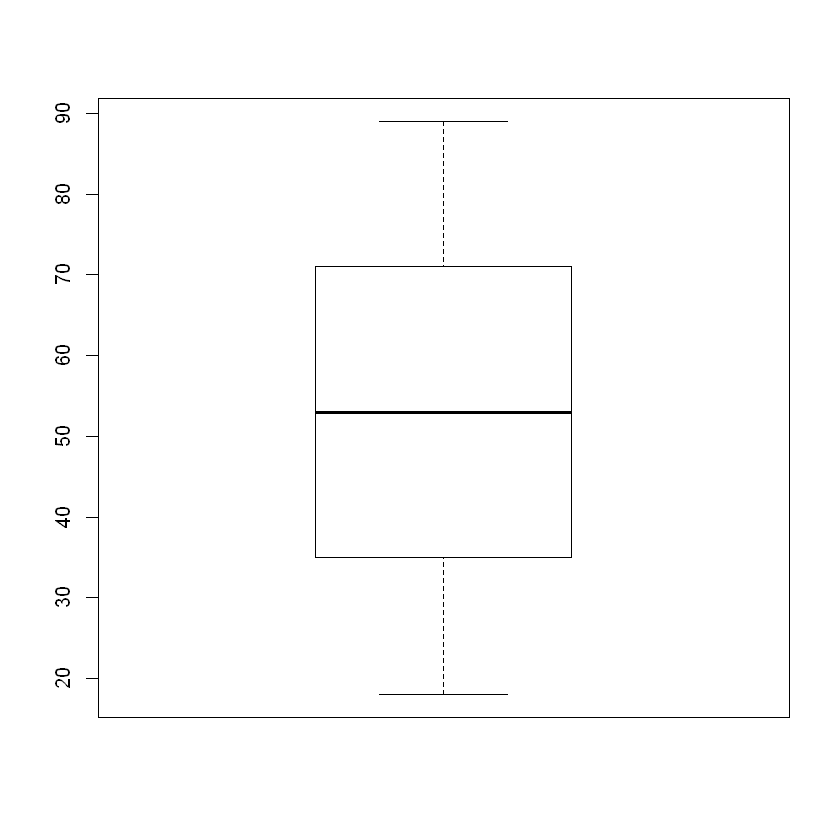

In [3]:
boxplot(med_raw_data$Age)

We see that Age does not contain any outliers; however, we must remember that the lowest value is 18, giving us only information on adult patients. The research question should be amended to: "Are patients over the age of 18 with specific characteristics, whether personal or medical, more likely to be readmitted than others?"

# Dividing the Data

In [4]:
data_1hot <- select(med_raw_data, Customer_id, Area, Marital, Gender)
summary(data_1hot)

  Customer_id         Area               Marital    
 A01882 :   1   Rural   :3369   Divorced     :1961  
 A02880 :   1   Suburban:3328   Married      :2023  
 A03496 :   1   Urban   :3303   Never Married:1984  
 A04182 :   1                   Separated    :1987  
 A05530 :   1                   Widowed      :2045  
 A08637 :   1                                       
 (Other):9994                                       
                  Gender    
 Female              :5018  
 Male                :4768  
 Prefer not to answer: 214  
                            
                            
                            
                            

This table contains the variables that require encoding by a one-hot encoder which turns each category within a non-ordinal categorical variable into its own variable and assigns a value of 1 to the newly-created variable representing the category which was the value of the old variable and assigns a value of 0 to each other newly-created variable.

In [5]:
med_raw_data <- read.csv(file="medical_raw_data.csv", stringsAsFactors=FALSE)

Here, we must reload the data to ensure that any categorical variables are loaded as Characters rather than Factors. The one_hot() function requires the presence of Factors and the summary of Factor variables is more informative than a summary of Character variables. For the remaining transformations, Character variables are required for easier comparison.

In [6]:
data_nulls <- select(med_raw_data, Customer_id, Age, Overweight, Anxiety)
summary(data_nulls)

 Customer_id             Age         Overweight        Anxiety      
 Length:10000       Min.   :18.0   Min.   :0.0000   Min.   :0.0000  
 Class :character   1st Qu.:35.0   1st Qu.:0.0000   1st Qu.:0.0000  
 Mode  :character   Median :53.0   Median :1.0000   Median :0.0000  
                    Mean   :53.3   Mean   :0.7091   Mean   :0.3223  
                    3rd Qu.:71.0   3rd Qu.:1.0000   3rd Qu.:1.0000  
                    Max.   :89.0   Max.   :1.0000   Max.   :1.0000  
                    NA's   :2414   NA's   :982      NA's   :984     

This table contains each variable that contains nulls. While "Prefer not to answer" could be considered a null value in the Gender variable, I have decided to leave it as an option in recognition of non-binary and gender-fluid persons.

In [7]:
data_ord <- select(med_raw_data, Customer_id, Education, Employment, Complication_risk)
summary(data_ord)

 Customer_id         Education          Employment        Complication_risk 
 Length:10000       Length:10000       Length:10000       Length:10000      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  

This table contains categorical variables with ordinal categories, meaning those categories where the categories are not arbitrary and some are higher-value than others.

In [8]:
data_yn <- select(med_raw_data, Customer_id, ReAdmis, HighBlood, Stroke, Arthritis, Diabetes, Hyperlipidemia, 
                  BackPain, Allergic_rhinitis, Reflux_esophagitis, Asthma)
summary(data_yn)

 Customer_id          ReAdmis           HighBlood            Stroke         
 Length:10000       Length:10000       Length:10000       Length:10000      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
  Arthritis           Diabetes         Hyperlipidemia       BackPain        
 Length:10000       Length:10000       Length:10000       Length:10000      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 Allergic_rhinitis  Reflux_esophagitis    Asthma         
 Length:10000       Length:10000       Length:10000      
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  

This table contains variables that contain only yes or no answers. For variables in this table, a null should be interpreted as a no response as it indicates a lack of a diagnoses. For these reasons, a one-hot encoder would be redundant and there is no required dropping or replacing of null values prior to encoding.

# Data-Cleaning

In [9]:
data_nulls <- data_nulls[!is.na(data_nulls$Age),]
summary(data_nulls)

 Customer_id             Age         Overweight        Anxiety      
 Length:7586        Min.   :18.0   Min.   :0.0000   Min.   :0.0000  
 Class :character   1st Qu.:35.0   1st Qu.:0.0000   1st Qu.:0.0000  
 Mode  :character   Median :53.0   Median :1.0000   Median :0.0000  
                    Mean   :53.3   Mean   :0.7126   Mean   :0.3186  
                    3rd Qu.:71.0   3rd Qu.:1.0000   3rd Qu.:1.0000  
                    Max.   :89.0   Max.   :1.0000   Max.   :1.0000  
                                   NA's   :750      NA's   :732     

Here, we remove any entries that have no value for the age variable as any replacement value could skew the data in unforseen ways.

In [10]:
i <- 0
for (x in is.na(data_nulls$Anxiety)) {
  i <- i + 1
  if(x == TRUE) {
    data_nulls[i, "Anxiety"] <- 0
  }
}

i <- 0
for (x in is.na(data_nulls$Overweight)) {
  i <- i + 1
  if(x == TRUE) {
    data_nulls[i, "Overweight"] <- 0
  }
}
summary(data_nulls)

 Customer_id             Age         Overweight        Anxiety      
 Length:7586        Min.   :18.0   Min.   :0.0000   Min.   :0.0000  
 Class :character   1st Qu.:35.0   1st Qu.:0.0000   1st Qu.:0.0000  
 Mode  :character   Median :53.0   Median :1.0000   Median :0.0000  
                    Mean   :53.3   Mean   :0.6421   Mean   :0.2879  
                    3rd Qu.:71.0   3rd Qu.:1.0000   3rd Qu.:1.0000  
                    Max.   :89.0   Max.   :1.0000   Max.   :1.0000  

Here we replace any null values with an answer equivalent to no in the numerical form, 0, for the Anxiety and Overweight variables. This is an acceptable transformation as a null response to a diagnosis indicates a lack of a diagnosis.

This idea is better expressed mathematically:  
"No" = !("Yes") but "Yes" != !"No"

In [11]:
data_1hot <- one_hot(as.data.table(data_1hot), cols=c("Area", "Marital", "Gender"))
data_1hot$Customer_id <- as.character(data_1hot$Customer_id)
summary(data_1hot)

 Customer_id          Area_Rural     Area_Suburban      Area_Urban    
 Length:10000       Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 Class :character   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Mode  :character   Median :0.0000   Median :0.0000   Median :0.0000  
                    Mean   :0.3369   Mean   :0.3328   Mean   :0.3303  
                    3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
                    Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
 Marital_Divorced Marital_Married  Marital_Never Married Marital_Separated
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000        Min.   :0.0000   
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000        1st Qu.:0.0000   
 Median :0.0000   Median :0.0000   Median :0.0000        Median :0.0000   
 Mean   :0.1961   Mean   :0.2023   Mean   :0.1984        Mean   :0.1987   
 3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.0000        3rd Qu.:0.0000   
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000    

Here, the one-hot encoder encodes the categorical variables as described above and we transform the character data into numbers.

In [12]:
i <- 0
for (x in data_yn$ReAdmis) {
  i <- i + 1
  if(x == "Yes") {
    data_yn[i, "ReAdmis"] <- 1
  } else {
    data_yn[i, "ReAdmis"] <- 0
  }
}

i <- 0
for (x in data_yn$HighBlood) {
  i <- i + 1
  if(x == "Yes") {
    data_yn[i, "HighBlood"] <- 1
  } else {
    data_yn[i, "HighBlood"] <- 0
  }
}

i <- 0
for (x in data_yn$Stroke) {
  i <- i + 1
  if(x == "Yes") {
    data_yn[i, "Stroke"] <- 1
  } else {
    data_yn[i, "Stroke"] <- 0
  }
}

i <- 0
for (x in data_yn$Arthritis) {
  i <- i + 1
  if(x == "Yes") {
    data_yn[i, "Arthritis"] <- 1
  } else {
    data_yn[i, "Arthritis"] <- 0
  }
}

i <- 0
for (x in data_yn$Diabetes) {
  i <- i + 1
  if(x == "Yes") {
    data_yn[i, "Diabetes"] <- 1
  } else {
    data_yn[i, "Diabetes"] <- 0
  }
}

i <- 0
for (x in data_yn$Hyperlipidemia) {
  i <- i + 1
  if(x == "Yes") {
    data_yn[i, "Hyperlipidemia"] <- 1
  } else {
    data_yn[i, "Hyperlipidemia"] <- 0
  }
}

i <- 0
for (x in data_yn$BackPain) {
  i <- i + 1
  if(x == "Yes") {
    data_yn[i, "BackPain"] <- 1
  } else {
    data_yn[i, "BackPain"] <- 0
  }
}

i <- 0
for (x in data_yn$Allergic_rhinitis) {
  i <- i + 1
  if(x == "Yes") {
    data_yn[i, "Allergic_rhinitis"] <- 1
  } else {
    data_yn[i, "Allergic_rhinitis"] <- 0
  }
}

i <- 0
for (x in data_yn$Reflux_esophagitis) {
  i <- i + 1
  if(x == "Yes") {
    data_yn[i, "Reflux_esophagitis"] <- 1
  } else {
    data_yn[i, "Reflux_esophagitis"] <- 0
  }
}

i <- 0
for (x in data_yn$Asthma) {
  i <- i + 1
  if (x == "Yes") {
    data_yn[i, "Asthma"] <- 1
  } else {
    data_yn[i, "Asthma"] <- 0
  }
}

data_yn <- transform(data_yn, ReAdmis=as.numeric(ReAdmis),
                              HighBlood=as.numeric(HighBlood), 
                              Stroke=as.numeric(Stroke),
                              Arthritis=as.numeric(Arthritis), 
                              Diabetes=as.numeric(Diabetes), 
                              Hyperlipidemia=as.numeric(Hyperlipidemia), 
                              BackPain=as.numeric(BackPain), 
                              Allergic_rhinitis=as.numeric(Allergic_rhinitis), 
                              Reflux_esophagitis=as.numeric(Reflux_esophagitis), 
                              Asthma=as.numeric(Asthma))

summary(data_yn)

 Customer_id           ReAdmis         HighBlood         Stroke      
 Length:10000       Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :0.0000   Median :0.000   Median :0.0000  
                    Mean   :0.3669   Mean   :0.409   Mean   :0.1993  
                    3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :1.0000   Max.   :1.000   Max.   :1.0000  
   Arthritis         Diabetes      Hyperlipidemia      BackPain     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.3574   Mean   :0.2738   Mean   :0.3372   Mean   :0.4114  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
 Allergic_rhinitis Reflux_e

Here, the yes or no responses are encoded and transformed into numerical datapoints.

In [13]:
unique(data_ord$Education)

[1] "Some College, Less than 1 Year"          
 [2] "Some College, 1 or More Years, No Degree"
 [3] "GED or Alternative Credential"           
 [4] "Regular High School Diploma"             
 [5] "Bachelor's Degree"                       
 [6] "Master's Degree"                         
 [7] "Nursery School to 8th Grade"             
 [8] "9th Grade to 12th Grade, No Diploma"     
 [9] "Doctorate Degree"                        
[10] "Associate's Degree"                      
[11] "Professional School Degree"              
[12] "No Schooling Completed"

The categories for Employment and Complication_risk can be seen in the initial summary of the data while the full list of categories for the Education variable is provided above by the unique() function.

In [14]:
i <- 0
for (x in data_ord$Complication_risk) {
  i <- i + 1
  if (x == "Low"){
    data_ord[i, "Complication_risk"] <- 0
  } else if (x == "Medium") {
    data_ord[i, "Complication_risk"] <- 0.5
  } else if (x == "High") {
    data_ord[i, "Complication_risk"] <- 1
  }
}

i <- 0
for (x in data_ord$Education) {
  i <- i + 1
  if (x == "No Schooling Completed"){
    data_ord[i, "Education"] <- 0
  } else if (x == "Nursery School to 8th Grade") {
    data_ord[i, "Education"] <- 1
  } else if (x == "9th Grade to 12th Grade, No Diploma") {
    data_ord[i, "Education"] <- 2
  } else if (x == "GED or Alternative Credential") {
    data_ord[i, "Education"] <- 3
  } else if (x == "Regular High School Diploma") {
    data_ord[i, "Education"] <- 4
  } else if (x == "Some College, Less than 1 Year") {
    data_ord[i, "Education"] <- 5
  } else if (x == "Some College, 1 or More Years, No Degree") {
    data_ord[i, "Education"] <- 6
  } else if (x == "Associate's Degree") {
    data_ord[i, "Education"] <- 7
  } else if (x == "Bachelor's Degree") {
    data_ord[i, "Education"] <- 8
  } else if (x == "Professional School Degree") {
    data_ord[i, "Education"] <- 8
  } else if (x == "Master's Degree") {
    data_ord[i, "Education"] <- 9
  } else if (x == "Doctorate Degree") {
    data_ord[i, "Education"] <- 10
  }
}

i <- 0
for (x in data_ord$Employment) {
  i <- i + 1
  if (x == "Unemployed"){
    data_ord[i, "Employment"] <- 0
  } else if (x == "Student") {
    data_ord[i, "Employment"] <- 1
  } else if (x == "Retired") {
    data_ord[i, "Employment"] <- 1
  } else if (x == "Part Time") {
    data_ord[i, "Employment"] <- 2
  } else if (x == "Full Time") {
    data_ord[i, "Employment"] <- 3
  }
}

data_ord <- transform(data_ord, Complication_risk=as.numeric(Complication_risk),
                                Education=as.numeric(Education),
                                Employment=as.numeric(Employment))

summary(data_ord)

 Customer_id          Education        Employment    Complication_risk
 Length:10000       Min.   : 0.000   Min.   :0.000   Min.   :0.0000   
 Class :character   1st Qu.: 4.000   1st Qu.:1.000   1st Qu.:0.5000   
 Mode  :character   Median : 6.000   Median :3.000   Median :0.5000   
                    Mean   : 5.356   Mean   :2.207   Mean   :0.5616   
                    3rd Qu.: 8.000   3rd Qu.:3.000   3rd Qu.:1.0000   
                    Max.   :10.000   Max.   :3.000   Max.   :1.0000   

Here, the ordinal data is encoded and transformed to a numerical datapoint.

# Recombining the Data

In [15]:
joined1 = inner_join(data_nulls, data_1hot, by="Customer_id")
joined2 = inner_join(data_ord, data_yn, by="Customer_id")
joined_tot = inner_join(joined1, joined2, by="Customer_id")
summary(joined_tot)

 Customer_id             Age         Overweight        Anxiety      
 Length:7586        Min.   :18.0   Min.   :0.0000   Min.   :0.0000  
 Class :character   1st Qu.:35.0   1st Qu.:0.0000   1st Qu.:0.0000  
 Mode  :character   Median :53.0   Median :1.0000   Median :0.0000  
                    Mean   :53.3   Mean   :0.6421   Mean   :0.2879  
                    3rd Qu.:71.0   3rd Qu.:1.0000   3rd Qu.:1.0000  
                    Max.   :89.0   Max.   :1.0000   Max.   :1.0000  
   Area_Rural     Area_Suburban      Area_Urban     Marital_Divorced
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.3368   Mean   :0.3317   Mean   :0.3315   Mean   :0.1964  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
 Marital_Married  Marital_Never Ma

Using the 'dsplyr' package, we recombined the seperate data tables with an inner-join, ensuring that the rows dropped earlier do not repopulate into the combined dataset by using the Customer_id as the join Index.

In [16]:
standardize <- function(x){
    (x-min(x))/(max(x)-min(x))
}

Using the formula for standardization, we create a function which will standardize numerical data between zero and one.

In [17]:
joined_tot$Age <- standardize(joined_tot$Age)
joined_tot$Employment <- standardize(joined_tot$Employment)
joined_tot$Education <- standardize(joined_tot$Education)

summary(joined_tot)

 Customer_id             Age           Overweight        Anxiety      
 Length:7586        Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 Class :character   1st Qu.:0.2394   1st Qu.:0.0000   1st Qu.:0.0000  
 Mode  :character   Median :0.4930   Median :1.0000   Median :0.0000  
                    Mean   :0.4971   Mean   :0.6421   Mean   :0.2879  
                    3rd Qu.:0.7465   3rd Qu.:1.0000   3rd Qu.:1.0000  
                    Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
   Area_Rural     Area_Suburban      Area_Urban     Marital_Divorced
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.3368   Mean   :0.3317   Mean   :0.3315   Mean   :0.1964  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
 Marital_Married  Ma

We standardize the remaining fields not between 0 and 1 to complete cleaning of the data.

We are finally left with a dataset containing all of the variables which we started with in a numerical, standardized format which is ready to be explored.

# Preview of Cleaned Dataset

In [18]:
joined_tot

Customer_id,Age,Overweight,Anxiety,Area_Rural,Area_Suburban,Area_Urban,Marital_Divorced,Marital_Married,Marital_Never Married,...,ReAdmis,HighBlood,Stroke,Arthritis,Diabetes,Hyperlipidemia,BackPain,Allergic_rhinitis,Reflux_esophagitis,Asthma
C412403,0.49295775,0,1,0,1,0,1,0,0,...,0,1,0,1,1,0,1,1,0,1
Z919181,0.46478873,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
F995323,0.49295775,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
A879973,0.84507042,0,0,0,1,0,0,1,0,...,0,0,1,1,0,0,0,0,1,1
C544523,0.05633803,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
S543885,0.81690141,1,0,0,0,1,0,0,1,...,0,0,0,1,1,0,1,1,0,0
E543302,0.45070423,1,1,1,0,0,0,0,1,...,0,1,0,1,1,1,1,0,1,0
K477307,0.30985915,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Q870521,0.42253521,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Z229385,0.84507042,1,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,1,1


# Exporting the Cleaned Dataset

In [19]:
write.csv(joined_tot, "medical_data_cleaned.csv")

# Principal Component Analysis

In [20]:
joined_tot.pca <- prcomp(joined_tot[,2:28], center=TRUE, scale=TRUE)
summary(joined_tot.pca)

Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.40255 1.22975 1.22584 1.12912 1.12478 1.12114 1.11963
Proportion of Variance 0.07286 0.05601 0.05566 0.04722 0.04686 0.04655 0.04643
Cumulative Proportion  0.07286 0.12887 0.18452 0.23174 0.27860 0.32515 0.37158
                           PC8    PC9    PC10    PC11    PC12    PC13   PC14
Standard deviation     1.03888 1.0327 1.02184 1.02061 1.01459 1.01359 1.0089
Proportion of Variance 0.03997 0.0395 0.03867 0.03858 0.03813 0.03805 0.0377
Cumulative Proportion  0.41155 0.4511 0.48972 0.52830 0.56643 0.60448 0.6422
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     1.00236 0.99669 0.99422 0.99035 0.98513 0.98222 0.97821
Proportion of Variance 0.03721 0.03679 0.03661 0.03633 0.03594 0.03573 0.03544
Cumulative Proportion  0.67939 0.71619 0.75280 0.78912 0.82507 0.86080 0.89624
                          PC22   P